In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv("calendar.csv")

In [3]:
calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [4]:
calendar.shape

(319192, 8)

In [5]:
len(calendar.listing_id.unique())

1749

**We see that there are only 1749 unique listing id's, but the number of rows in calendar table is 319192. This means that each listing is repeated multiple times in the calendar. This could be as each listing's availability, price, and other details are updated every few days. This also makes sense in the real world - prices of rooms changes frequently depending on various factors, availability also changes every few days or even multiple times a day.**

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [7]:
calendar.price.describe()

count    319117.000000
mean        109.917779
std         185.791168
min          13.000000
25%          59.000000
50%          79.000000
75%         115.000000
max        5800.000000
Name: price, dtype: float64

In [8]:
calendar.price.skew()

19.171456826061497

<AxesSubplot:xlabel='price'>

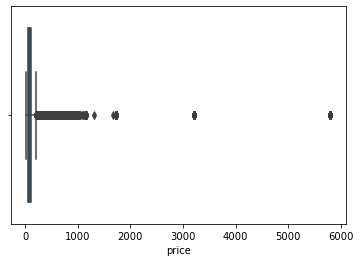

In [9]:
sns.boxplot(x=calendar.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

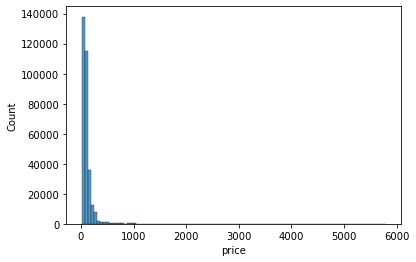

In [10]:
sns.histplot(calendar.price,bins=100)

**Tentative transformations needed on Price column:**
- Missing value treatment
- Outlier treatment
- Reduce skewness by log transformation
- Normalization

In [11]:
hosts = pd.read_csv("hosts.csv")

In [12]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [13]:
hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [14]:
listings = pd.read_csv("listings.csv")

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [16]:
reviews = pd.read_csv("reviews.csv")

In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [18]:
dataset = pd.merge(listings, hosts, on='host_id')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
 14  host_name       1749 non-null   object 
 15  host_since      1749 non-null   object 
 16  host_location   1746 non-null   object 
 17  host_about      865 non-null    o

In [20]:
data2=pd.merge(dataset,calendar,how='right',on='listing_id')

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319192 entries, 0 to 319191
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   listing_url     319192 non-null  object 
 2   name            319192 non-null  object 
 3   description     306489 non-null  object 
 4   latitude        319192 non-null  float64
 5   longitude       319192 non-null  float64
 6   property_type   319192 non-null  object 
 7   room_type       319192 non-null  object 
 8   accomodates     319192 non-null  int64  
 9   bathrooms_text  319192 non-null  object 
 10  bedrooms        295816 non-null  float64
 11  beds            311764 non-null  float64
 12  amenities       319192 non-null  object 
 13  host_id         319192 non-null  int64  
 14  host_name       319192 non-null  object 
 15  host_since      319192 non-null  object 
 16  host_location   318631 non-null  object 
 17  host_about

**For now, we are not including reviews table as this makes the data too large to deal with efficiently. Additionally, most of the data in reviews is either not useful or needs to be processed before it can be used. Hence, this is our final "aggregated" data for now.**

In [23]:
data2.to_csv("data.csv",index=False)

# Start here to get aggregated data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

**Finding information for the Data Quality Report**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   listing_url     319192 non-null  object 
 2   name            319192 non-null  object 
 3   description     306489 non-null  object 
 4   latitude        319192 non-null  float64
 5   longitude       319192 non-null  float64
 6   property_type   319192 non-null  object 
 7   room_type       319192 non-null  object 
 8   accomodates     319192 non-null  int64  
 9   bathrooms_text  319192 non-null  object 
 10  bedrooms        295816 non-null  float64
 11  beds            311764 non-null  float64
 12  amenities       319192 non-null  object 
 13  host_id         319192 non-null  int64  
 14  host_name       319192 non-null  object 
 15  host_since      319192 non-null  object 
 16  host_location   318631 non-null  object 
 17  host_about

In [4]:
len(data.listing_id.unique())

1749

In [5]:
data.listing_id.isnull().sum()

0

In [6]:
len(data.listing_url.unique())

1749

In [7]:
data.listing_url.isnull().sum()

0

In [8]:
len(data.name.unique())

1710

In [9]:
data.name.isnull().sum()

0

In [10]:
len(data.description.unique())

1557

In [11]:
data.description.isnull().sum()/data.description.shape

array([0.03979736])

In [12]:
len(data.latitude.unique())

1372

In [13]:
data.latitude.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319192.000000
mean         51.214075
std           0.013730
min          51.160084
25%          51.207870
50%          51.216550
75%          51.220880
90%          51.225720
95%          51.230580
max          51.349400
Name: latitude, dtype: float64

In [14]:
data.latitude.isnull().sum()

0

In [15]:
len(data.longitude.unique())

1483

In [16]:
data.longitude.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319192.000000
mean          4.413150
std           0.019365
min           4.290770
25%           4.400140
50%           4.409460
75%           4.424660
90%           4.439050
95%           4.447670
max           4.483470
Name: longitude, dtype: float64

In [17]:
data.longitude.isnull().sum()

0

In [18]:
len(data.property_type.unique())

39

In [19]:
data.property_type.isnull().sum()

0

In [20]:
len(data.room_type.unique())

4

In [21]:
data.room_type.isnull().sum()

0

In [22]:
len(data.accomodates.unique())

15

In [23]:
data.accomodates.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319192.000000
mean          3.762619
std           2.771459
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
90%           7.000000
95%          10.000000
max          16.000000
Name: accomodates, dtype: float64

In [24]:
data.accomodates.isnull().sum()

0

In [25]:
len(data.bathrooms_text.unique())

26

In [26]:
data.bathrooms_text.isnull().sum()

0

In [27]:
len(data.bedrooms.unique())

14

In [28]:
data.bedrooms.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    295816.000000
mean          1.529028
std           1.097678
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
90%           2.000000
95%           3.000000
max          20.000000
Name: bedrooms, dtype: float64

In [29]:
data.bedrooms.isnull().sum()/data.bedrooms.shape

array([0.07323492])

In [30]:
len(data.beds.unique())

20

In [31]:
data.beds.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    311764.000000
mean          2.222784
std           2.249001
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
90%           4.000000
95%           5.000000
max          44.000000
Name: beds, dtype: float64

In [32]:
data.beds.isnull().sum()/data.beds.shape

array([0.02327126])

In [33]:
data.amenities.unique().shape

(1656,)

In [34]:
data.amenities.isnull().sum()

0

In [35]:
data.host_id.unique().shape

(1111,)

In [36]:
data.host_id.isnull().sum()

0

In [37]:
data.host_name.unique().shape

(749,)

In [38]:
data.host_name.isnull().sum()

0

In [39]:
data.host_since.unique().shape

(927,)

In [40]:
data.host_since.isnull().sum()

0

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   listing_url     319192 non-null  object 
 2   name            319192 non-null  object 
 3   description     306489 non-null  object 
 4   latitude        319192 non-null  float64
 5   longitude       319192 non-null  float64
 6   property_type   319192 non-null  object 
 7   room_type       319192 non-null  object 
 8   accomodates     319192 non-null  int64  
 9   bathrooms_text  319192 non-null  object 
 10  bedrooms        295816 non-null  float64
 11  beds            311764 non-null  float64
 12  amenities       319192 non-null  object 
 13  host_id         319192 non-null  int64  
 14  host_name       319192 non-null  object 
 15  host_since      319192 non-null  object 
 16  host_location   318631 non-null  object 
 17  host_about

In [42]:
data.host_location.unique().shape

(150,)

In [43]:
data.host_location.isnull().sum()/data.host_location.shape

array([0.00175756])

In [44]:
data.host_about.unique().shape

(489,)

In [45]:
data.host_about.isnull().sum()/data.host_about.shape

array([0.50620316])

In [46]:
data.calender_id.unique().shape

(319192,)

In [47]:
data.calender_id.isnull().sum()

0

In [48]:
data.date.unique().shape

(365,)

In [49]:
data.date.isnull().sum()

0

In [50]:
data.available.isnull().sum()

0

In [51]:
len(data.price.unique())

599

In [52]:
data.price.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319117.000000
mean        109.917779
std         185.791168
min          13.000000
25%          59.000000
50%          79.000000
75%         115.000000
90%         180.000000
95%         250.000000
max        5800.000000
Name: price, dtype: float64

In [53]:
data.price.isnull().sum()/data.price.shape

array([0.00023497])

In [54]:
len(data.adjusted_price.unique())

597

In [55]:
data.adjusted_price.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319117.000000
mean        109.712131
std         185.551851
min          13.000000
25%          58.000000
50%          79.000000
75%         115.000000
90%         180.000000
95%         250.000000
max        5800.000000
Name: adjusted_price, dtype: float64

In [56]:
data.adjusted_price.isnull().sum()/data.price.shape

array([0.00023497])

In [57]:
len(data.minimum_nights.unique())

36

In [58]:
data.minimum_nights.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319192.000000
mean          5.379395
std          21.456127
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
90%           7.000000
95%          25.000000
max         500.000000
Name: minimum_nights, dtype: float64

In [59]:
data.minimum_nights.isnull().sum()/data.minimum_nights.shape

array([0.])

In [60]:
len(data.maximum_nights.unique())

208

In [61]:
data.maximum_nights.describe(percentiles=[0.25,0.75,0.9,0.95,0.5])

count    319192.000000
mean        812.206102
std         511.622075
min           1.000000
25%         365.000000
50%        1125.000000
75%        1125.000000
90%        1125.000000
95%        1125.000000
max        9999.000000
Name: maximum_nights, dtype: float64

In [62]:
data.maximum_nights.isnull().sum()/data.price.shape

array([0.])

<AxesSubplot:>

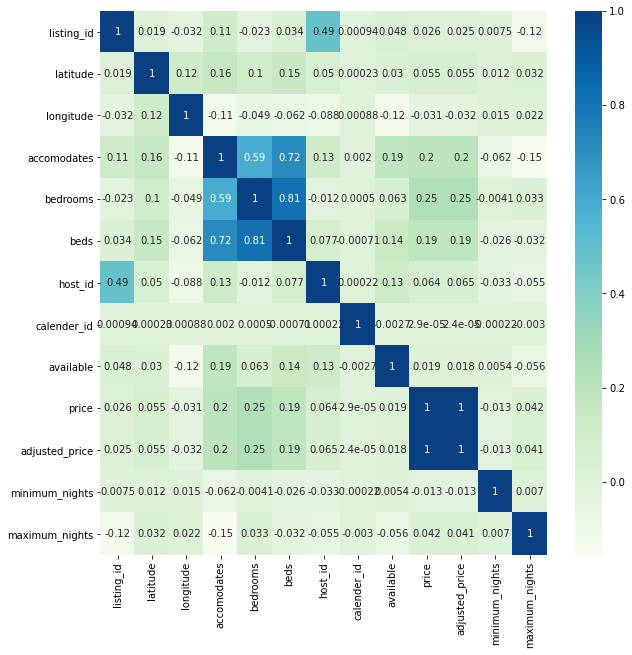

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap = 'GnBu')

The following variables have a noticeable correlation:
 - Host ID and Listing ID
 - Bedrooms and Accomodates
 - Beds and Accomodates
 - Bedrooms and Beds
 - Price and Accomodates
 - Price and Bedrooms
 - Adjusted Price and Bedrooms
 - Adjusted Price and Beds
 - Adjusted Price and Price

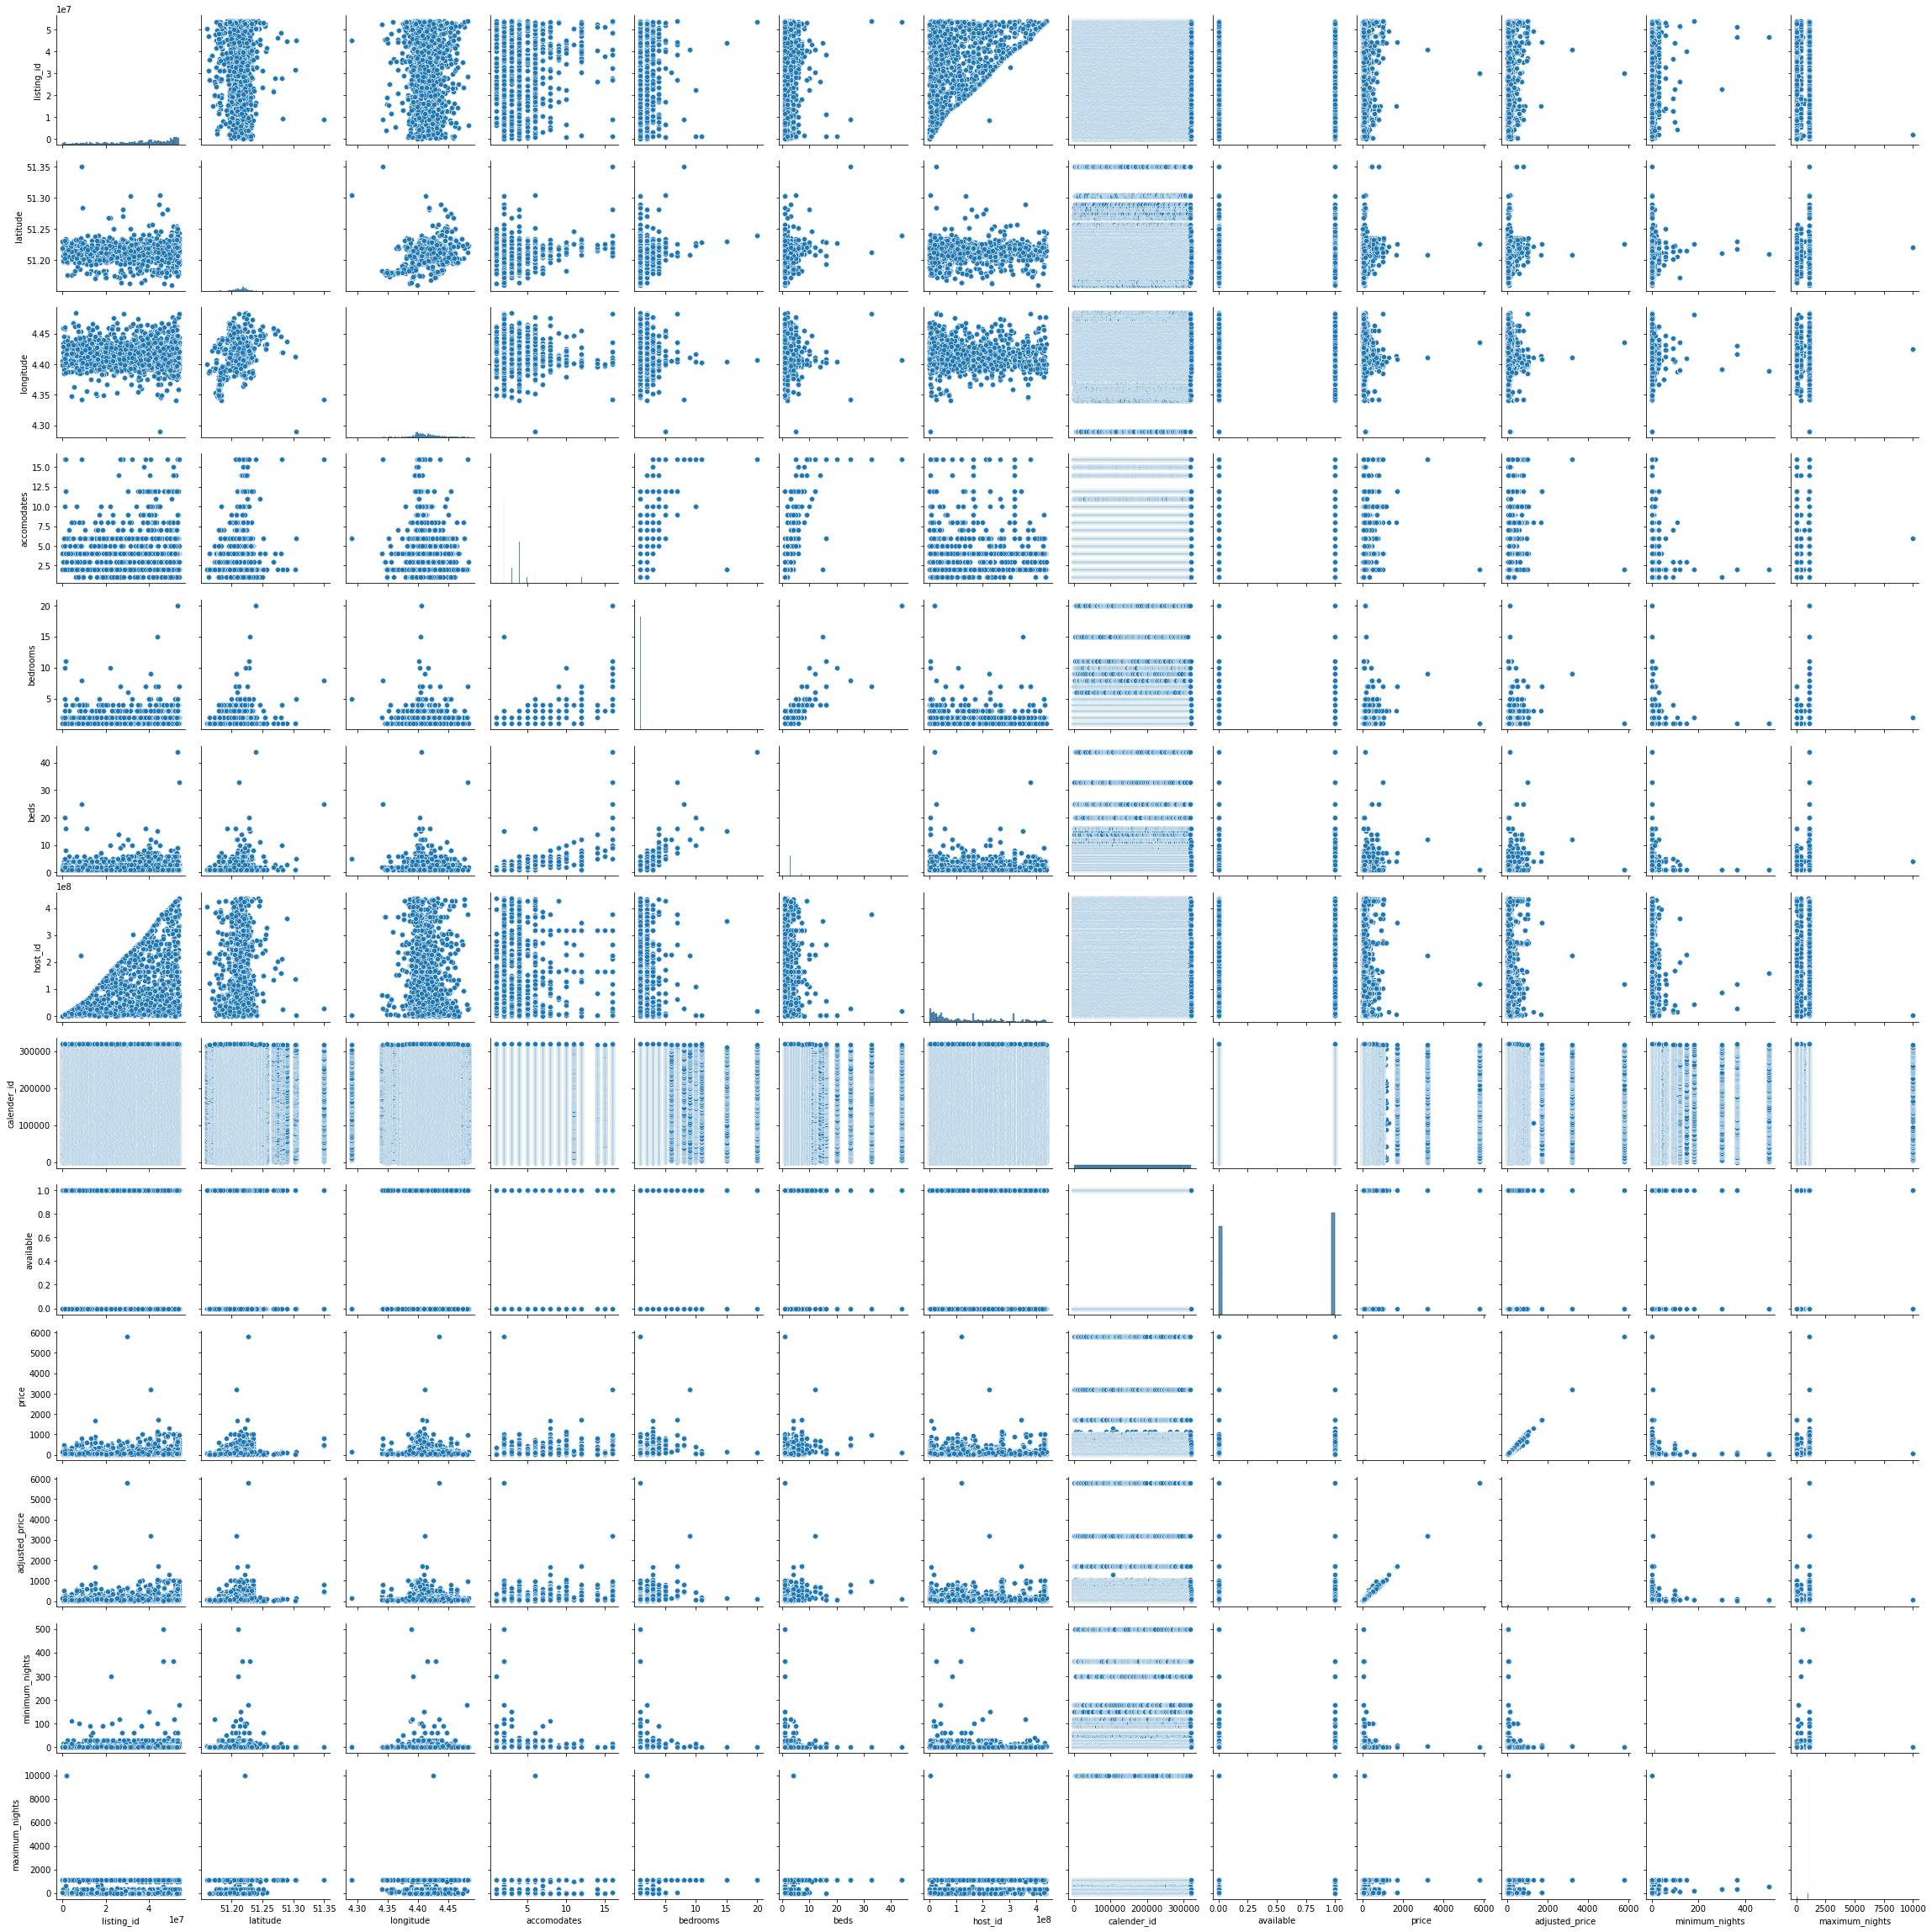

In [81]:
sns.pairplot(data)

**The pairplot is not very informative for such a large dataset. Let us look specifically at the relation between the price column and all the other numerical columns**

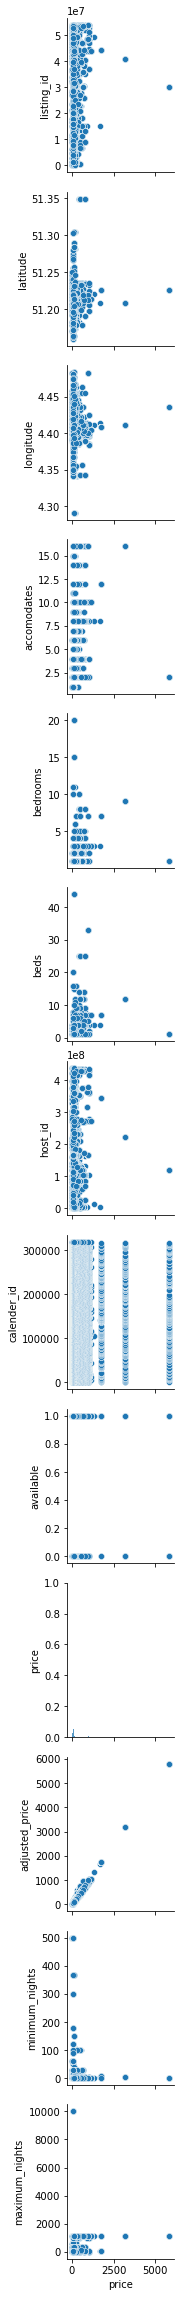

In [82]:
sns.pairplot(data, x_vars='price')

**As was evident from the correlation matrix and heatmap, none of the predictor variables have a clear relationship with the price column on their own.**

Let us now begin fixing the data and treating the columns to make them fit for prediction, and remove irrelevant columns.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   listing_url     319192 non-null  object 
 2   name            319192 non-null  object 
 3   description     306489 non-null  object 
 4   latitude        319192 non-null  float64
 5   longitude       319192 non-null  float64
 6   property_type   319192 non-null  object 
 7   room_type       319192 non-null  object 
 8   accomodates     319192 non-null  int64  
 9   bathrooms_text  319192 non-null  object 
 10  bedrooms        295816 non-null  float64
 11  beds            311764 non-null  float64
 12  amenities       319192 non-null  object 
 13  host_id         319192 non-null  int64  
 14  host_name       319192 non-null  object 
 15  host_since      319192 non-null  object 
 16  host_location   318631 non-null  object 
 17  host_about

In [65]:
data.listing_url #this information does not seem useful for predicting price of the property. we can drop it.

0         https://www.airbnb.com/rooms/40334325
1         https://www.airbnb.com/rooms/22742449
2         https://www.airbnb.com/rooms/34621717
3         https://www.airbnb.com/rooms/38281744
4         https://www.airbnb.com/rooms/18835003
                          ...                  
319187    https://www.airbnb.com/rooms/52729945
319188    https://www.airbnb.com/rooms/36953202
319189    https://www.airbnb.com/rooms/39580214
319190    https://www.airbnb.com/rooms/49016014
319191    https://www.airbnb.com/rooms/31438714
Name: listing_url, Length: 319192, dtype: object

In [66]:
data.name #the name of the property will not help in determining its price. we can drop this column as well.

0                        Luxurious flat in central location
1                                 Cozy 2 bedroom apartement
2          Spacious apartment with garden, South of Antwerp
3           B in Antwerp-your luxurious getaway in Antwerp!
4            beautiful city center loft in an old warehouse
                                ...                        
319187                   The Antwerp Old City Residence 202
319188                      Charmante woning met privé tuin
319189    Marble Lodge Apartments in the Heart of Antwer...
319190                     Parkside room, house with a Soul
319191                    Modern Loft with in house parking
Name: name, Length: 319192, dtype: object

In [67]:
data.description #without NLP, this column is also not very helpful for price prediction. let us drop it for now

0         Luxurious flat in Antwerp close to various pub...
1         An amazing big and bright apartment in the hea...
2         <b>Guest access</b><br />* Public transport: T...
3         An elegant bedroom with an en-suite bathroom, ...
4         Enjoy this beautiful new loft in an old wareho...
                                ...                        
319187    Bright and beautiful newly built apartment, ve...
319188    Een charmante woning met privé tuin!<br /><br ...
319189    This beautiful luxury apartment is located rig...
319190    The house is situated opposite the Boekenberg ...
319191    Loft with open kitchen , bathroom en bedroom, ...
Name: description, Length: 319192, dtype: object

In [83]:
data2 = data.drop(['listing_url','name','description'], axis=1)

In [84]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   latitude        319192 non-null  float64
 2   longitude       319192 non-null  float64
 3   property_type   319192 non-null  object 
 4   room_type       319192 non-null  object 
 5   accomodates     319192 non-null  int64  
 6   bathrooms_text  319192 non-null  object 
 7   bedrooms        295816 non-null  float64
 8   beds            311764 non-null  float64
 9   amenities       319192 non-null  object 
 10  host_id         319192 non-null  int64  
 11  host_name       319192 non-null  object 
 12  host_since      319192 non-null  object 
 13  host_location   318631 non-null  object 
 14  host_about      157616 non-null  object 
 15  calender_id     319192 non-null  int64  
 16  date            319192 non-null  object 
 17  available 

In [97]:
splitter = lambda x: x.split(" ")[0]
bathrooms = data.bathrooms_text.apply(splitter)
bathrooms.replace(["Half-bath", "Shared", "Private"], 0.5,inplace=True) #all three of these labels correspond to 0.5 bathrooms.
bathrooms = bathrooms.astype('float')
data2['bathrooms'] = bathrooms
data2.drop("bathrooms_text", axis=1,inplace=True)

In [109]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   latitude        319192 non-null  float64
 2   longitude       319192 non-null  float64
 3   property_type   319192 non-null  object 
 4   room_type       319192 non-null  object 
 5   accomodates     319192 non-null  int64  
 6   bedrooms        295816 non-null  float64
 7   beds            311764 non-null  float64
 8   amenities       319192 non-null  object 
 9   host_id         319192 non-null  int64  
 10  host_name       319192 non-null  object 
 11  host_since      319192 non-null  object 
 12  host_location   318631 non-null  object 
 13  host_about      157616 non-null  object 
 14  calender_id     319192 non-null  int64  
 15  date            319192 non-null  object 
 16  available       319192 non-null  int64  
 17  price     

In [130]:
data3 = data2.drop(['host_name','host_about','calender_id','adjusted_price','host_location','host_id'],axis=1)

In [131]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   latitude        319192 non-null  float64
 2   longitude       319192 non-null  float64
 3   property_type   319192 non-null  object 
 4   room_type       319192 non-null  object 
 5   accomodates     319192 non-null  int64  
 6   bedrooms        295816 non-null  float64
 7   beds            311764 non-null  float64
 8   amenities       319192 non-null  object 
 9   host_since      319192 non-null  object 
 10  date            319192 non-null  object 
 11  available       319192 non-null  int64  
 12  price           319117 non-null  float64
 13  minimum_nights  319192 non-null  int64  
 14  maximum_nights  319192 non-null  int64  
 15  bathrooms       319192 non-null  float64
dtypes: float64(6), int64(5), object(5)
memory usage: 39.0+ M

## Missing Value treatment

In [132]:
data3.bedrooms.fillna(data3.bedrooms.mode()[0],inplace=True)

In [133]:
data3.beds.fillna(data3.beds.mode()[0],inplace=True)

In [139]:
data3.price.fillna(data3.price.median(),inplace=True)

In [140]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      319192 non-null  int64  
 1   latitude        319192 non-null  float64
 2   longitude       319192 non-null  float64
 3   property_type   319192 non-null  object 
 4   room_type       319192 non-null  object 
 5   accomodates     319192 non-null  int64  
 6   bedrooms        319192 non-null  float64
 7   beds            319192 non-null  float64
 8   amenities       319192 non-null  object 
 9   host_since      319192 non-null  object 
 10  date            319192 non-null  object 
 11  available       319192 non-null  int64  
 12  price           319192 non-null  float64
 13  minimum_nights  319192 non-null  int64  
 14  maximum_nights  319192 non-null  int64  
 15  bathrooms       319192 non-null  float64
dtypes: float64(6), int64(5), object(5)
memory usage: 39.0+ M

## Encoding categorical variables/ Date-time variables

In [149]:
data4 = pd.get_dummies(data3, columns=['property_type','room_type'], drop_first=True)

In [4]:
#both datetime columns are being converted to the UNIX timestamp format
data4['host_since'] = pd.to_datetime(data4.host_since)
data4['date'] = pd.to_datetime(data4.date)

In [9]:
data4[['host_since']] = (data4.host_since - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data4[['date']] = (data4.date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [157]:
amenities = set()
for row in data4.iterrows():
    a = row[1]['amenities'].strip("[]").split(",")
    [amenities.add(i) for i in a]

In [158]:
for amnt in amenities:
    data4[amnt] = 0

In [159]:
from tqdm import tqdm
for row in tqdm(data4.iterrows(),total=319192):
    amts = row[1]['amenities'].strip("[]").split(",")
    for amnt in amenities:
        if amnt in amts:
            row[1][amnt] = 1

100%|████████████████████████████████████████████████████████████████████████| 319192/319192 [02:41<00:00, 1977.14it/s]


The amenities column requires quite a bit of treatment - it is a string, consisting of a list of amenities that a listing has. First, we create a set of amenities, so that we have a unique list of amenities across all listings. Next, we create a new column for each amenity, in the dataframe. Finally, we loop over each row in the dataframe, and if that listing has a specific amenity, the corresponding column for that amenity is changed to have value 1 instead of 0.

Ultimately, however, we find that all this work does not help us much, because this treatment creates a LOT of additional columns in the dataframe, and it has a very negligible effect on the accuracy scores and mean squared errors of each model. These columns will eventually be dropped as part of model building process. Nonetheless, it has been included here.

In [160]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Columns: 593 entries, listing_id to  HBO Max
dtypes: datetime64[ns](2), float64(6), int64(543), object(1), uint8(41)
memory usage: 1.3+ GB


In [161]:
data4.drop("amenities",axis=1,inplace=True)

In [12]:
data4.to_csv("preprocessed.csv",index=False)

In [2]:
data4 = pd.read_csv("preprocessed.csv")

In [11]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Columns: 592 entries, listing_id to  HBO Max
dtypes: float64(6), int64(586)
memory usage: 1.4 GB


**We now have our preprocessed data. There will still be further changes to this dataframe, but we will build some preliminary models before making these changes. This model building procedure has been performed in a separate Jupyter Notebook, 'Model Building.ipynb'**